<p>
    <b> Part 1 ‐ Exploratory data analysis </b> <br><br>
    
    `Problem statement` 
    
    The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them
    
</p>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

# load json file as data frame.
logins_df = pd.read_json('/Users/vishnu/Downloads/ultimate_challenge/logins.json')
# sorted by login times.
logins_ord_df = logins_df.sort_values('login_time')
# create login time index on data frame.
logins_ord_df.index = pd.DatetimeIndex(logins_ord_df.login_time)

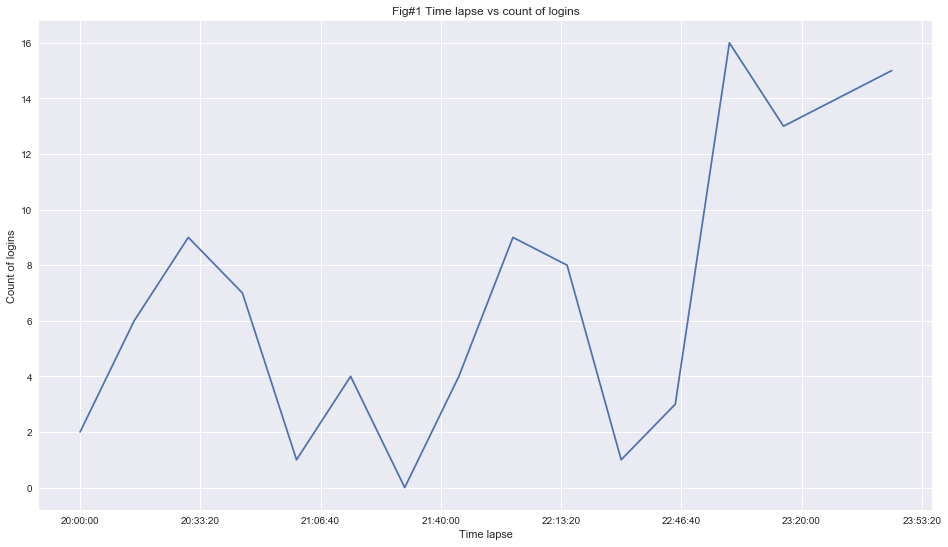

In [17]:
# all logins in date of 1970-01-01
logins_ord_1970_01 = logins_ord_df.loc[pd.to_datetime(logins_ord_df['login_time'].dt.date) <= '1970-01-01']

# group records with 15 min interval.
logins_ord_1970_01_cnt = logins_ord_1970_01.resample('15T').count()

# x-axis as time and count as y-axis.
X = logins_ord_1970_01_cnt.index.time
y = logins_ord_1970_01_cnt.login_time.values

# create a plot of time vs no of logins.
plt.plot(X,y)
plt.xlabel('Time lapse')
plt.ylabel('Count of logins')
plt.title('Fig#1 Time lapse vs count of logins')
plt.show()


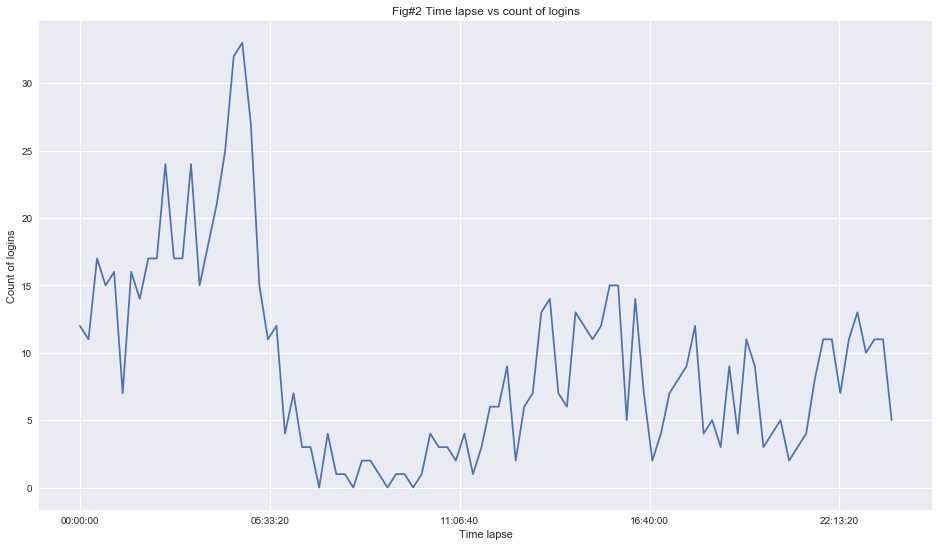

In [18]:
# all logins in date of 1970-02-01
logins_ord_1970_02 = logins_ord_df.loc[pd.to_datetime(logins_ord_df['login_time'].dt.date) == '1970-02-01']
# group records with 15 min interval.
logins_ord_1970_02_cnt = logins_ord_1970_02.resample('15T').count()
# x-axis as time and count as y-axis.
X = logins_ord_1970_02_cnt.index.time
y = logins_ord_1970_02_cnt.login_time.values
# create a plot of time vs no of logins.
plt.plot(X,y)
plt.xlabel('Time lapse')
plt.ylabel('Count of logins')
plt.title('Fig#2 Time lapse vs count of logins')
plt.show()

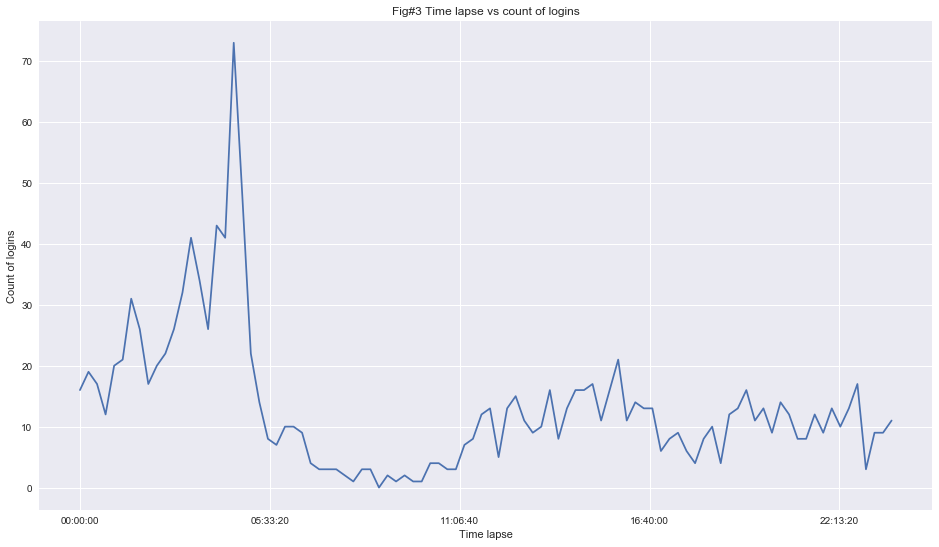

In [19]:
# all logins in date of 1970-03-01
logins_ord_1970_03 = logins_ord_df.loc[pd.to_datetime(logins_ord_df['login_time'].dt.date) == '1970-03-01']
# group records with 15 min interval.
logins_ord_1970_03_cnt = logins_ord_1970_03.resample('15T').count()
# x-axis as time and count as y-axis.
X = logins_ord_1970_03_cnt.index.time
y = logins_ord_1970_03_cnt.login_time.values
# create a plot of time vs no of logins.
plt.plot(X,y)
plt.xlabel('Time lapse')
plt.ylabel('Count of logins')
plt.title('Fig#3 Time lapse vs count of logins')
plt.show()

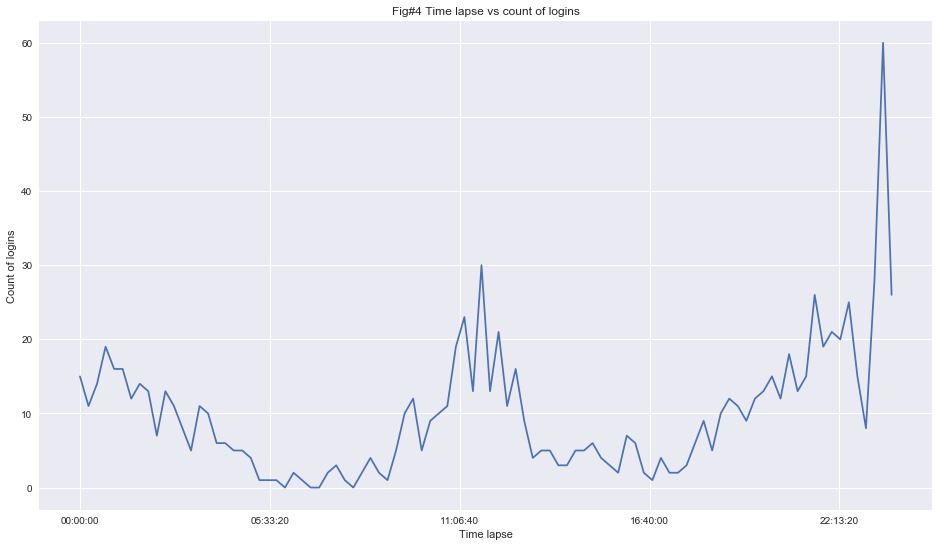

In [20]:
# all logins in date of 1970-4-01
logins_ord_1970_04 = logins_ord_df.loc[pd.to_datetime(logins_ord_df['login_time'].dt.date) == '1970-04-01']
# group records with 15 min interval.
logins_ord_1970_04_cnt = logins_ord_1970_04.resample('15T').count()
# x-axis as time and count as y-axis.
X = logins_ord_1970_04_cnt.index.time
y = logins_ord_1970_04_cnt.login_time.values
# create a plot of time vs no of logins.
plt.plot(X,y)
plt.xlabel('Time lapse')
plt.ylabel('Count of logins')
plt.title('Fig#4 Time lapse vs count of logins')
plt.show()

<b> `Observations` </b>

    *I have to break the timeseries for each day of 4 days worth of data.
    *With exception of Jan 1st. typically logins preak in early hours around 5:30am and low peak around 3:00pm.
    *Jan 4th being sunday may not be outlier or need more info for better understanding.


<p>

`Part 2 ‐ Experiment and metrics design`

</p>

`Meric`

<p>
Appropriate Metic would be ratio of no. of trips other than base location of partner to total trips
 under taken.

No. of trips with origin/ destination with other than base location of partner shows that 
partner is taking advantage of fee toll program.

need for ratio to clarify what is signifiance of the trip with respect to total trips
</p>

`Experiment`

<p>
 Choose on month worth of data and then derive values for above metric, this is refered as series 1. 
 Then after toll reimbersement implemented derive same metric for 1 month, this is refered as series 2. 
   <br> </br> 
    <br> </br> 
 Now, we have two series and we do Hypothesis testing
 <br> </br> 
 <br> </br> 
 H0: U1-U2 ==0 
 <br> </br> 
 H1: U1-U2 !=0
 <br> </br> 
 <br> </br> 
 note: U1 is mean of series 1 and U2 is mean of series 2
 <br> </br> 
 Based on this testing we can conclude the significance of program.
 
</p>

`Part 3 ‐ Predictive modeling`

In [164]:
import json

with open('/Users/vishnu/Downloads/ultimate_challenge/ultimate_data_challenge.json') as f:
   data = json.load(f)
   ultimate_predicting_df = pd.DataFrame(data)

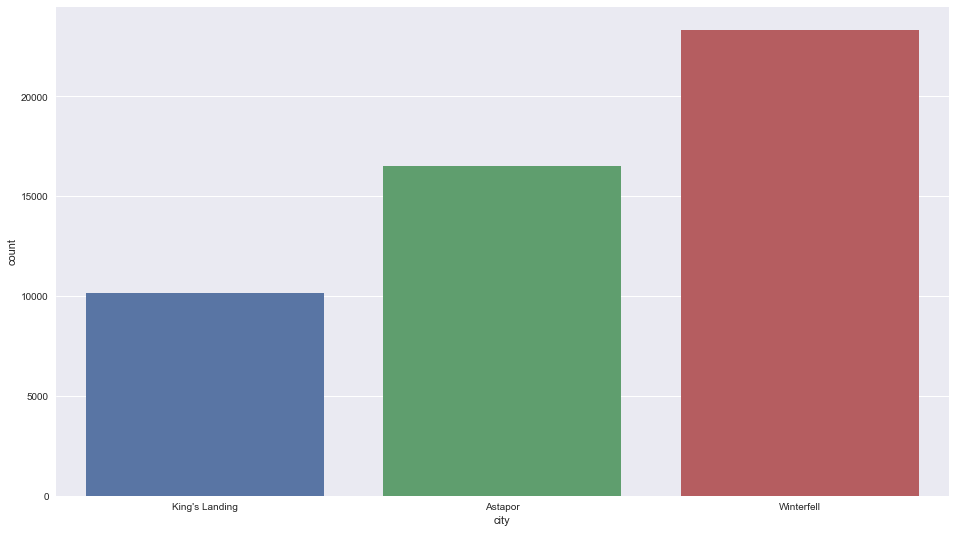

In [165]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
sns.set(style="darkgrid")

sns.countplot(x='city',data=ultimate_predicting_df)
plt.show()

In [166]:
ultimate_predicting_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [167]:
ultimate_predicting_df[ultimate_predicting_df.trips_in_first_30_days == 0].count()

avg_dist                  15390
avg_rating_by_driver      15296
avg_rating_of_driver      11641
avg_surge                 15390
city                      15390
last_trip_date            15390
phone                     15312
signup_date               15390
surge_pct                 15390
trips_in_first_30_days    15390
ultimate_black_user       15390
weekday_pct               15390
dtype: int64

In [168]:
ultimate_predicting_df[ultimate_predicting_df.trips_in_first_30_days > 0].count()

avg_dist                  34610
avg_rating_by_driver      34503
avg_rating_of_driver      30237
avg_surge                 34610
city                      34610
last_trip_date            34610
phone                     34292
signup_date               34610
surge_pct                 34610
trips_in_first_30_days    34610
ultimate_black_user       34610
weekday_pct               34610
dtype: int64

In [169]:
# note : at later point try to to pursue alternative options.
#ultimate_predicting_df['phone'].replace(to_replace=['Android','iPhone'], value=[0,1], inplace=True)
ultimate_predicting_df['city'].replace(to_replace=['King\'s Landing','Astapor','Winterfell'],value=[0,1,2], inplace=True)
ultimate_predicting_df['ultimate_black_user'].replace(to_replace=[True,False], value=[1,0], inplace=True)

In [170]:
ultimate_predicting_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,0,2014-06-17,iPhone,2014-01-25,15.4,4,1,46.2
1,8.26,5.0,5.0,1.00,1,2014-05-05,Android,2014-01-29,0.0,0,0,50.0
2,0.77,5.0,4.3,1.00,1,2014-01-07,iPhone,2014-01-06,0.0,3,0,100.0
3,2.36,4.9,4.6,1.14,0,2014-06-29,iPhone,2014-01-10,20.0,9,1,80.0
4,3.13,4.9,4.4,1.19,2,2014-03-15,Android,2014-01-27,11.8,14,0,82.4


In [171]:
ultimate_predicting_df['trips_taken_in_first_30_days_bool'] = np.where(ultimate_predicting_df.trips_in_first_30_days == 0,0,1)

In [172]:
customers_retained = ultimate_predicting_df['trips_taken_in_first_30_days_bool'].sum()/ ultimate_predicting_df['trips_taken_in_first_30_days_bool'].count()

print("Percentage of customers retained %s" %(customers_retained*100))

Percentage of customers retained 69.22


In [173]:
ultimate_predicting_simp_df = ultimate_predicting_df[['avg_dist', 'avg_rating_by_driver', 'avg_surge',
       'city', 'phone', 'surge_pct', 'ultimate_black_user', 'weekday_pct',
       'trips_taken_in_first_30_days_bool']]

In [174]:
#sns.pairplot(ultimate_predicting_simp_df, diag_kind="kde", vars=['avg_dist', 'avg_rating_by_driver', 'avg_surge','city', 
#                                          'phone', 'surge_pct','trips_in_first_30_days', 'ultimate_black_user', 
#                                          'weekday_pct','trips_taken_in_first_30_days_bool'])
#plt.show()

In [175]:
ultimate_predicting_simp_df = pd.get_dummies(ultimate_predicting_simp_df, columns=['phone'])
# replace with averge value
avg_ratings = ultimate_predicting_simp_df.avg_rating_by_driver.mean()
ultimate_predicting_simp_df.loc[X.avg_rating_by_driver.isna(),'avg_rating_by_driver'] = avg_ratings

y = ultimate_predicting_simp_df.trips_taken_in_first_30_days_bool
X = ultimate_predicting_simp_df.drop(['trips_taken_in_first_30_days_bool'],axis= 1)

In [176]:
ultimate_predicting_simp_df

,avg_dist,avg_rating_by_driver,avg_surge,city,surge_pct,ultimate_black_user,weekday_pct,trips_taken_in_first_30_days_bool,phone_Android,phone_iPhone
0,3.67,5.0,1.10,0,15.4,1,46.2,1,0,1
1,8.26,5.0,1.00,1,0.0,0,50.0,0,1,0
2,0.77,5.0,1.00,1,0.0,0,100.0,1,0,1
3,2.36,4.9,1.14,0,20.0,1,80.0,1,0,1
4,3.13,4.9,1.19,2,11.8,0,82.4,1,1,0
5,10.56,5.0,1.00,2,0.0,1,100.0,1,0,1
6,3.95,4.0,1.00,1,0.0,0,100.0,1,1,0
7,2.04,5.0,1.00,2,0.0,0,100.0,1,0,1
8,4.36,5.0,1.00,2,0.0,0,100.0,1,1,0
9,2.37,5.0,1.00,2,0.0,0,0.0,1,1,0


In [177]:
import numpy as np    
from sklearn.linear_model import LogisticRegression


m = LogisticRegression(C=5)
m.fit(X, y)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
# Those values, however, will show that the second parameter
# is more influential
print(m.coef_)

X.columns

[[-2.58468824e-02 -3.83543180e-02 -1.53235059e-02  1.74687950e-01
   1.55432102e-03  2.01267669e-01  1.40024750e-04 -5.57070338e-01
  -5.76068322e-01]]


Index(['avg_dist', 'avg_rating_by_driver', 'avg_surge', 'city', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'phone_Android', 'phone_iPhone'],
      dtype='object')